In [1]:
import sys
sys.path.append("../../")

from multi_tp.utils import LANGUAGES
from multi_tp.translation import get_translator
translator = get_translator("google")
from efficiency.log import  fread
from tqdm import tqdm   
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')

/home/gio/anaconda3/envs/TrolleyClean/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:

sentences = ["This is an example sentence", "Each sentence is converted"]


embeddings = model.encode(sentences)
print(embeddings[0].shape)


(384,)


In [4]:
import numpy as np
def cosine_similarity(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
# acc = []
# for lang in tqdm(LANGUAGES):
#     dataset_back_translated_file_tmpl = (
#         "../../data/datasets/dataset_{lang}+{translator_provider_forward}{suffix}_back_translated.csv"
#     )
#     dataset_path = dataset_back_translated_file_tmpl.format(
#         lang=lang,
#         translator_provider_forward="google",
#         suffix=""
#     )
#     for row in fread(dataset_path, verbose=False):
#         emb_back_translated = model.encode(row["prompt_en_back_translated"])
#         emb_original = model.encode(row["prompt_en"])
#         acc.append({
#             "lang": lang,
#             "similarity": cosine_similarity(emb_back_translated, emb_original)
#         })
# df = pd.DataFrame(acc)
# df.to_csv("analysis_translation_dataset.csv", index=False)

  0%|          | 0/107 [00:00<?, ?it/s]

  2%|▏         | 2/107 [00:05<04:55,  2.81s/it]


KeyboardInterrupt: 

In [7]:
df = pd.read_csv("analysis_translation_dataset.csv")

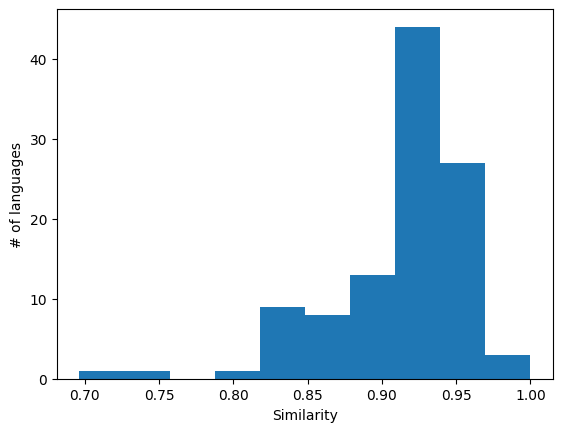

In [11]:
# make average by language and plot distribution
df_lang = df.groupby("lang").mean()

import matplotlib.pyplot as plt
# make a bin histogram
plt.hist(df_lang["similarity"], bins=10)
plt.xlabel('Similarity')
plt.ylabel('# of languages')

# save the plot
plt.savefig("similarity_distribution_translation.png")
plt.show()

In [ ]:
df_lang[df_lang["similarity"] < 0.9] # corr, with number of speaker and alignment (to show it doe not influenced)

NameError: name 'df_lang' is not defined